In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
x = 6*np.random.rand(200,1)-3
y = 0.8 * x**2 + 0.9*x + 2 + np.random.rand(200,1)

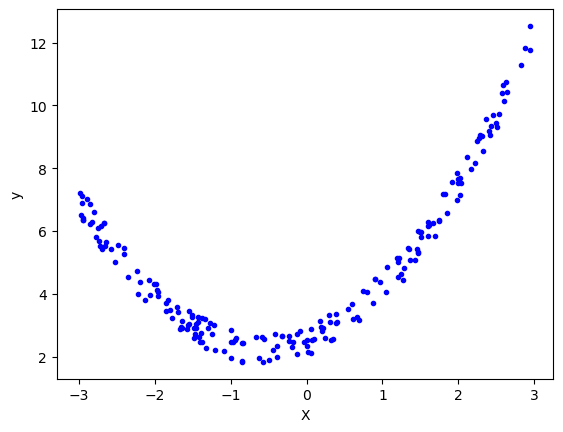

In [7]:
plt.plot(x, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.3426159103440959

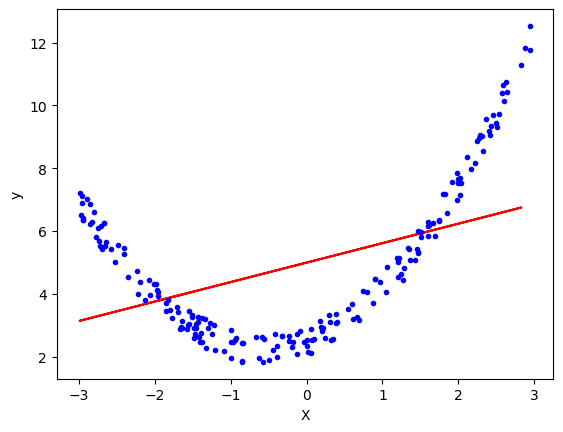

In [13]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [14]:
print(lr.coef_,lr.intercept_)

[[0.61997611]] [4.99279355]


In [15]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [16]:
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly,y_train)
y_pred = lr_poly.predict(x_test_poly)
r2_score(y_test,y_pred)

0.9920577240224171

In [17]:
print(lr_poly.coef_)
print(lr_poly.intercept_)

[[0.         0.89865789 0.78732754]]
[2.56962481]


In [27]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr_poly.predict(x_new_poly)

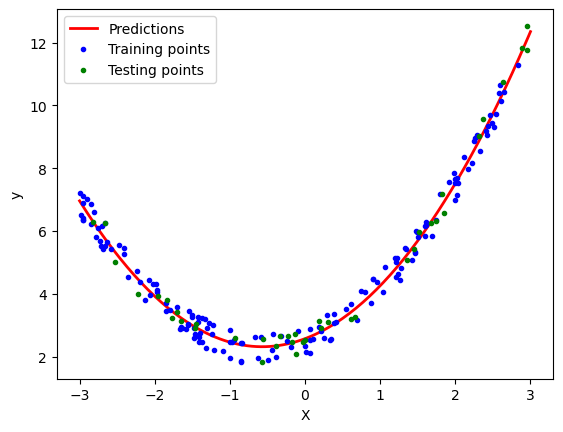

In [28]:
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()